# Part II - Ford GoBike Trip Explanatory Data 
#### (Exploring Trip Duration Based on Date and User Type)
## by Nifemi Lawal

## Investigation Overview


This analysis is aimed to explore the variations in trip duration in regards to:
- date and time (fousing on hours of the day, days of the week)
- user type (customer types)


## Dataset Overview and Executive Summary

> The dataset comprises details on around 183,000 bike rides taken through a bike-sharing system. It contains data with the duration of each ride in seconds, date and time information, user type, gender, as well as additional variables like the member's birth year, start and end station names, and corresponding geographical coordinates. Approximately 8300 data points were excluded from the analysis due to inconsistencies or missing data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df =pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Clean our dataset by removing null values and genders that are other
df = df[df['member_gender'] != 'Other']

df.dropna(inplace=True)

### Bike Service Peak Hours

> This provides us a visual representation of the bike service usage distribution across all hours of the day. Each bar in the plot corresponds to a specific hour, while the height of the bar indicates the count of people that used bike services during that hour. This visualization helps identify the periods where the demand for bike services is at its highest and lowest.


In [4]:
# Convert start_time and end_time columns to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Extract hour from start_time
df['start_hr'] = df['start_time'].dt.hour

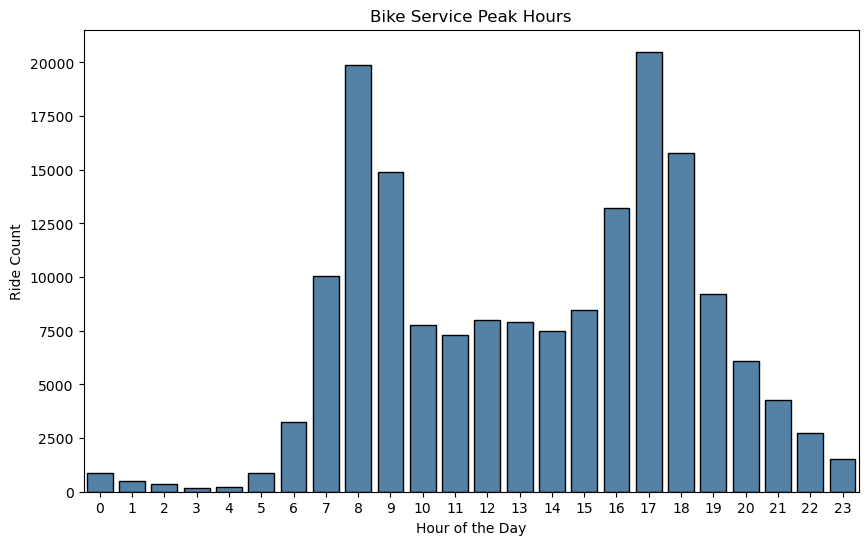

In [5]:
# Plot the count of bike service by hour
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='start_hr', color ='steelblue', linewidth=1, edgecolor='black')
plt.title('Bike Service Peak Hours'), plt.xlabel('Hour of the Day'), plt.ylabel('Ride Count')
plt.show()

### Hourly Service Usage Breakdown by User Type

> This plot provides a visual representation of the frequency of bike service usage throughout the day categorized by user type. Each bar on the plot represents the number of bike service used during a specific hour, with the lighter bar being for customers and darker for frequent users- subscribers. 

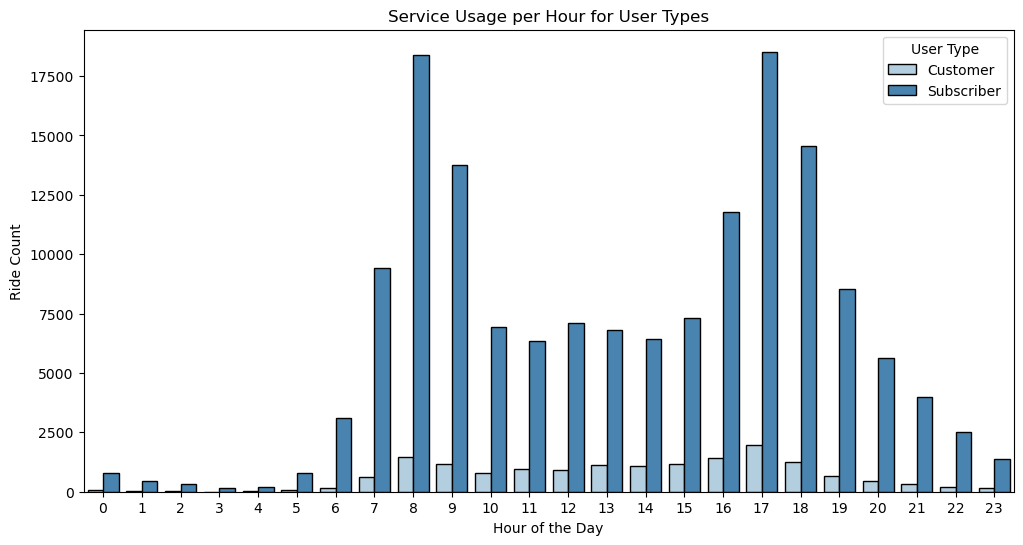

In [6]:
# Plot: Service usage per hour for user types
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='start_hr', hue='user_type', palette='Blues', linewidth=1, edgecolor='black')

plt.title('Service Usage per Hour for User Types')
plt.xlabel('Hour of the Day'), plt.ylabel('Ride Count'), plt.legend(title='User Type')

plt.show()

### Hourly Service Usage Breakdown by Gender

> This plot provides a visual representation of the frequency of bike service usage throughout the day categorized by user gender. Each bar on the plot represents the number of bike service used during a specific hour, with the lighter bar being for male and darker for females. 

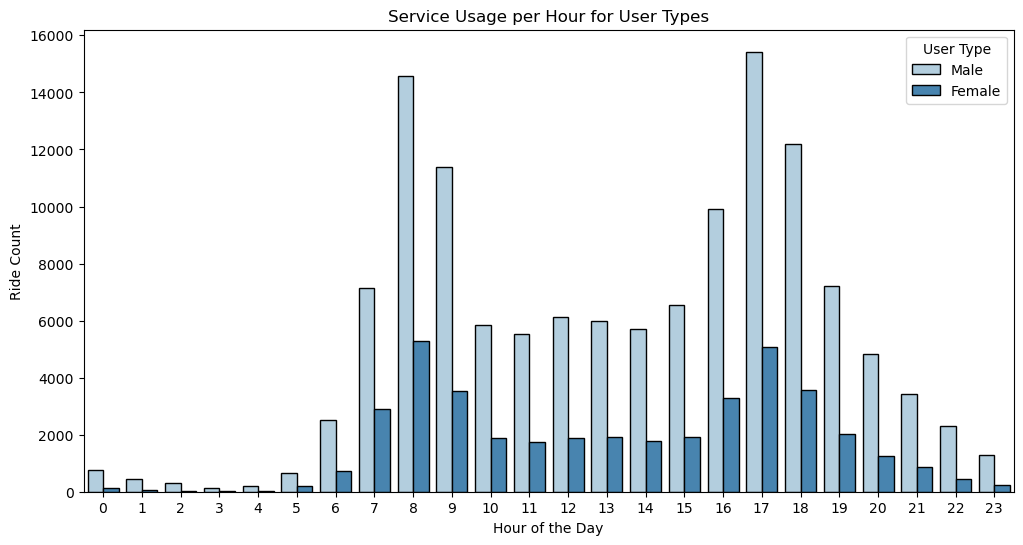

In [7]:
# Plot: Service usage per hour for user types
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='start_hr', hue='member_gender', palette='Blues', linewidth=1, edgecolor='black')

plt.title('Service Usage per Hour for User Types')
plt.xlabel('Hour of the Day'), plt.ylabel('Ride Count'), plt.legend(title='User Type')

plt.show()

## Trip Duration by Weekday

> This plot illustrates the average length of trips taken daily. Each bar represents the mean trip time taken on each day of the week.

In [11]:
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['start_day'] = df['start_time'].dt.day_name()

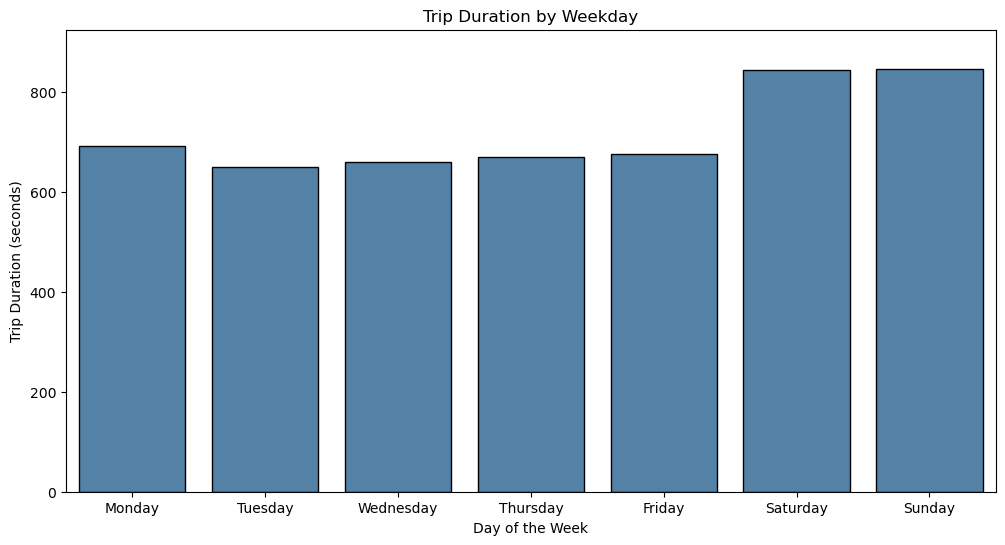

In [13]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='start_day', y='duration_sec', color='steelblue',
            errwidth=0, linewidth=1, edgecolor='black', order=weekdays_order)
plt.title('Trip Duration by Weekday')
plt.xlabel('Day of the Week'), plt.ylabel('Trip Duration (seconds)')

plt.show()

## Trip Duration by Weekday and Member Gender

> The bar plot highlights the average duration of bike trips taken every day during the course of the week organized by gender. Each bar on the graph represents the mean duration of trips taken on a specific day, with each distinct bar corresponding to a different gender- male in lightblue and female in a darker blue. 

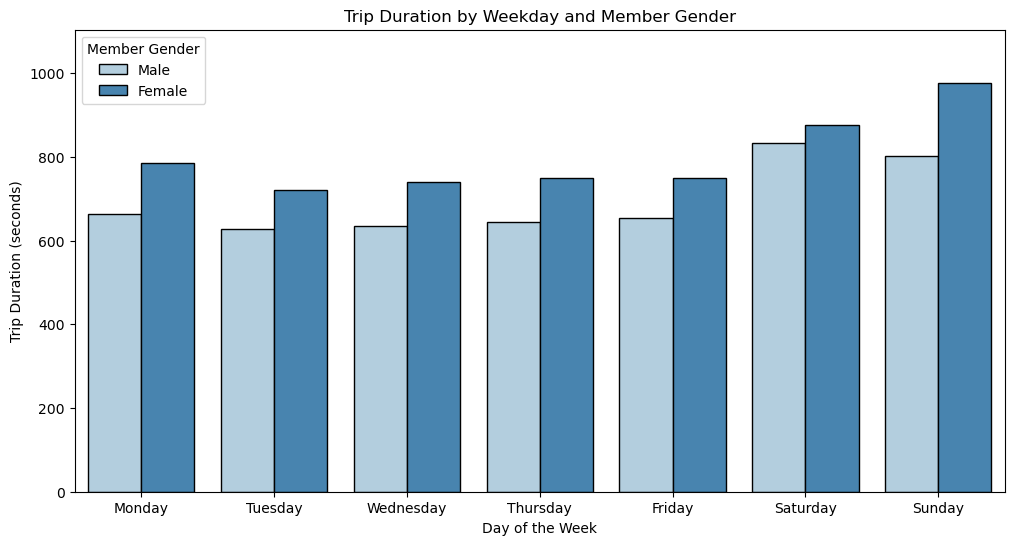

In [14]:
# Plot: start_day and member_gender vs. duration_sec
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='start_day', y='duration_sec', hue='member_gender', palette='Blues',
            errwidth=0, linewidth=1, edgecolor='black', order=weekdays_order)

plt.title('Trip Duration by Weekday and Member Gender')
plt.xlabel('Day of the Week'), plt.ylabel('Trip Duration (seconds)')
plt.legend(title='Member Gender')

plt.show()

## Trip Duration by Weekday and User Type

> This plot illustrates the average length of trips taken daily by both customers and frequent subscribers. Each bar represents the mean trip time taken on a specific day of the week, with a light blue bar for customers and darker blue bar for subscribers.

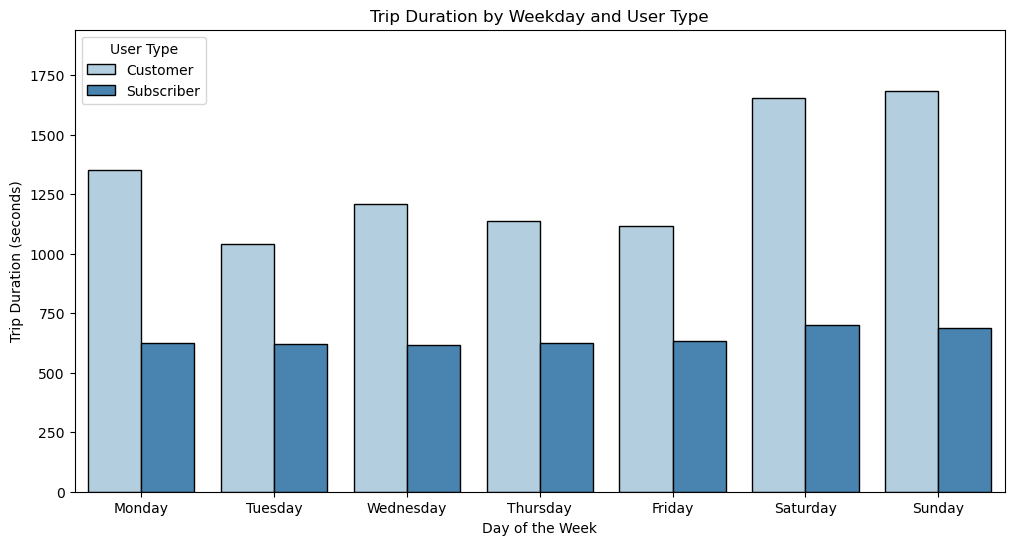

In [15]:
# Plot: start_day and user_type vs. duration_sec
plt.figure(figsize=(12, 6))

sns.barplot(data=df, x='start_day', y='duration_sec', hue='user_type', palette='Blues',
            errwidth=0, linewidth=1, edgecolor='black', order=weekdays_order)
plt.title('Trip Duration by Weekday and User Type')
plt.xlabel('Day of the Week'), plt.ylabel('Trip Duration (seconds)')
plt.legend(title='User Type')

plt.show()

### In Conclusion:
The analysis highlights:
*Based on Trip Count*
- The peak usage hours around the 8th and 17th hours of the day.
- The primary demographic using our bike service consists of male users. 
- Subscribers use the bike service a lot more frequently than regular customers. 

*Based on Trip Duration*
- The longest trips were taken during the weekend. 
- While male users use the bike more frequently, female users tend to spend more time using the bike service.
- Customers tend to utilize the bike service for longer durations compared to frequent subscribers.

In [ ]:
!jupyter nbconvert Ford_GoBike_System_Data_Part_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_GoBike_System_Data_Part_II.ipynb to slides
[NbConvertApp] Writing 784711 bytes to Ford_GoBike_System_Data_Part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Ford_GoBike_System_Data_Part_II.slides.html
Use Control-C to stop this server
404 GET /favicon.ico (127.0.0.1) 0.81ms
